In [201]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [202]:
nx=81 #total number of indices
dx=4.0/(nx-1)
nt=70
def u_initial():
    u=numpy.zeros(nx)
    bn=nx-numpy.round(nx/2)-1
    u[0:bn]=1
    return u

In [203]:
#This initializes u_initial as useable python expression
computeF=lambda u:(u/2)**2

In [204]:
def maccormack(u,nt,dt,dx):
    un=numpy.zeros((nt,len(u)))
    un[:]=u.copy()
    ustar=u.copy()
    
    for n in range(1,nt):
        F=computeF(u)
        ustar[:-1]=u[:-1]-(dt/dx)*(F[1:]-F[:-1])
        Fstar=computeF(ustar)
        un[n,1:]=0.5*(u[1:]+ustar[1:]-(dt/dx)*(Fstar[1:]-Fstar[:-1]))
        u=un[n].copy()
    return un

In [205]:
def animate(data):
    x=numpy.linspace(0,4,nx)
    y=data
    line.set_data(x,y)
    return line,

/opt/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



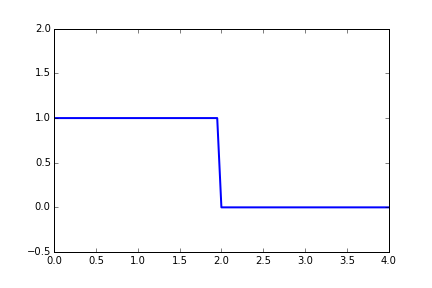
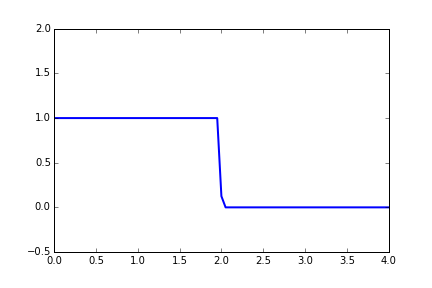
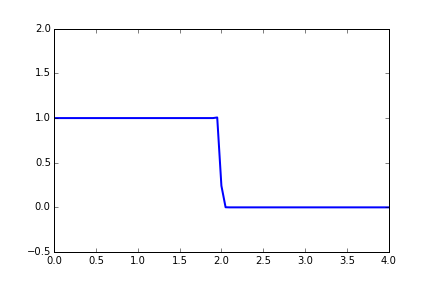
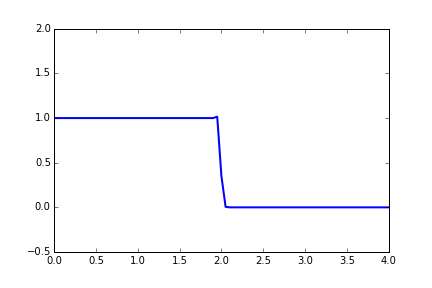
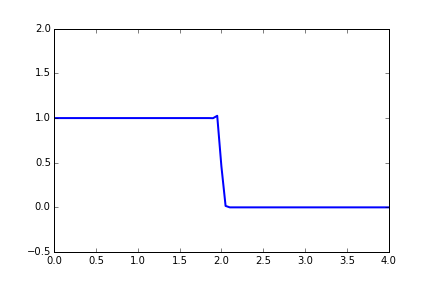
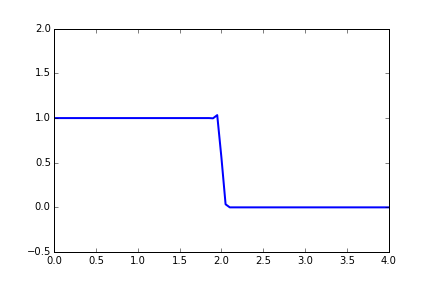
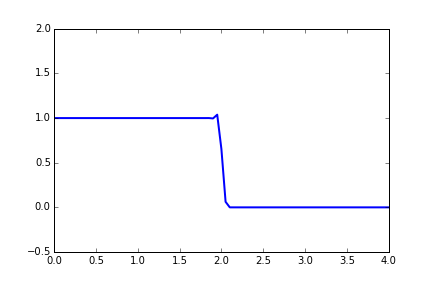
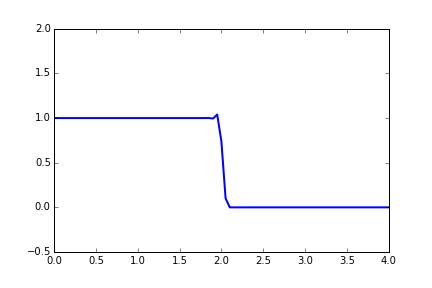
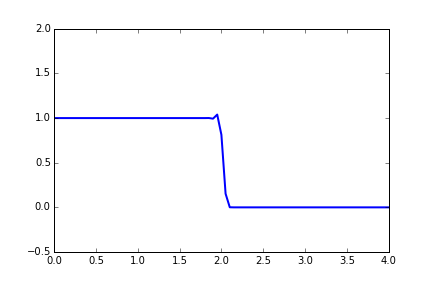
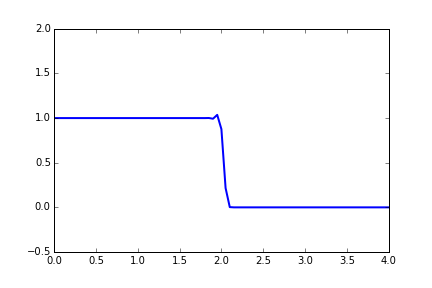
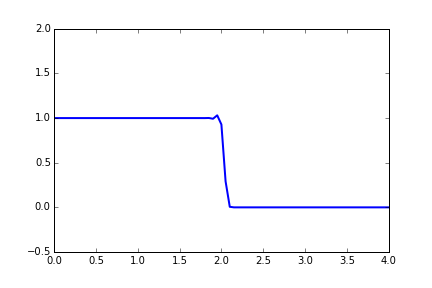
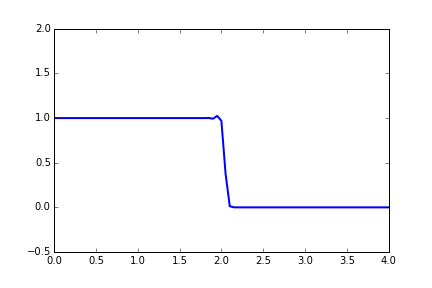
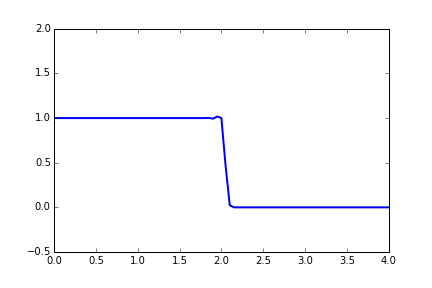
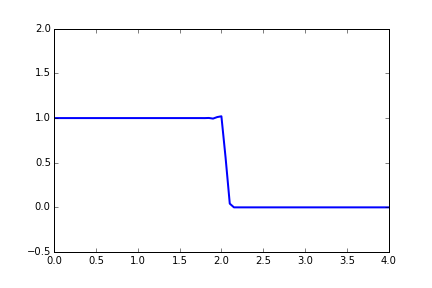
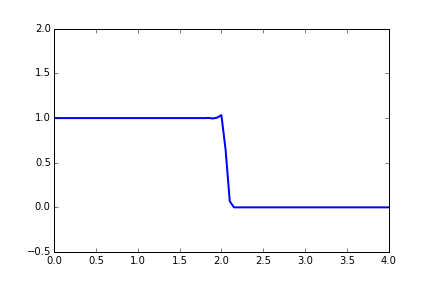
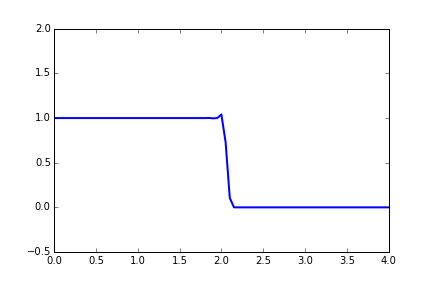
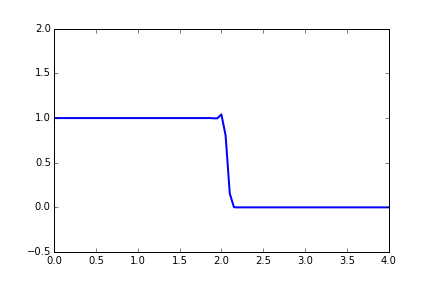
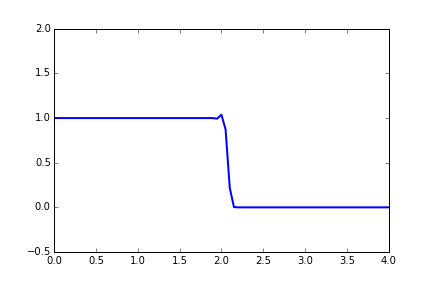
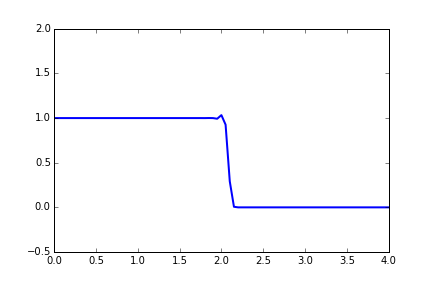
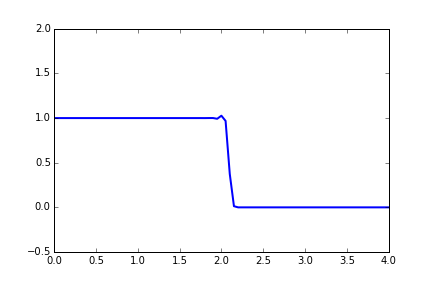
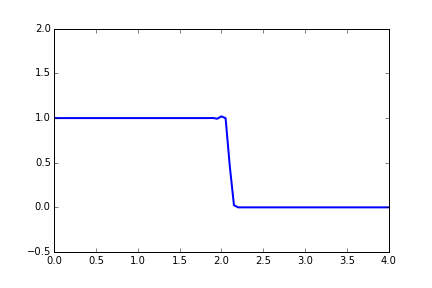
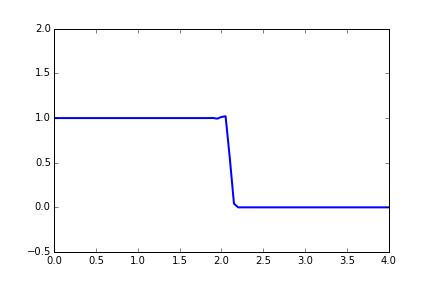
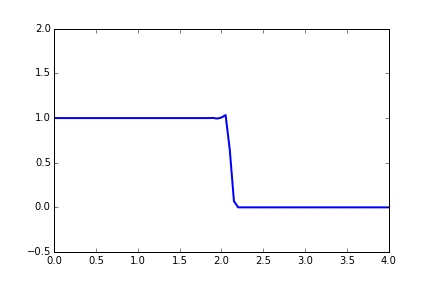
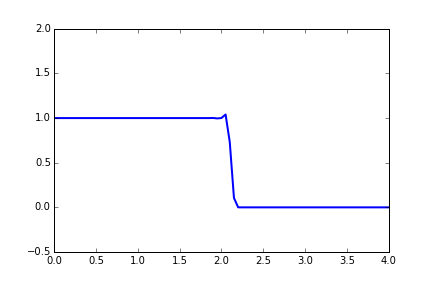
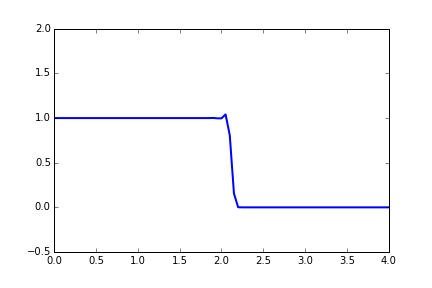
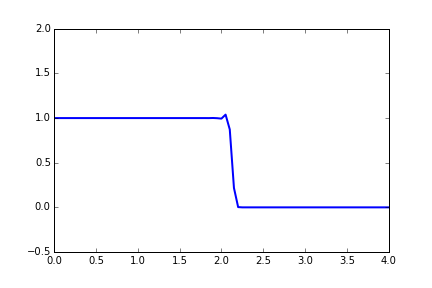
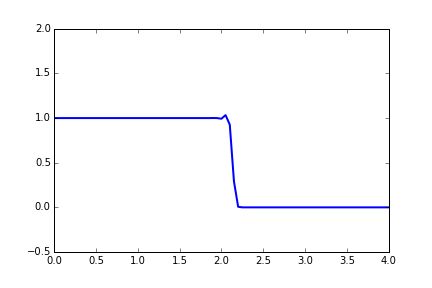
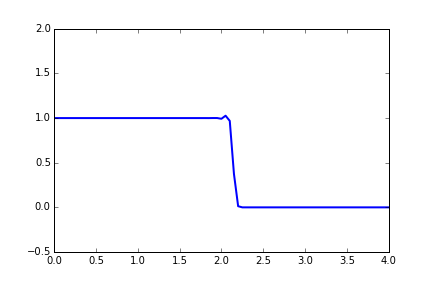
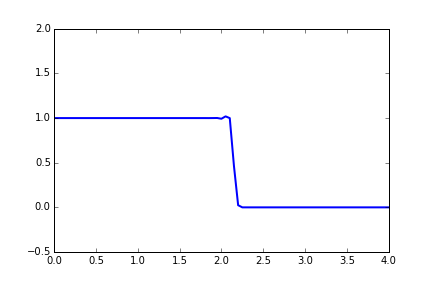
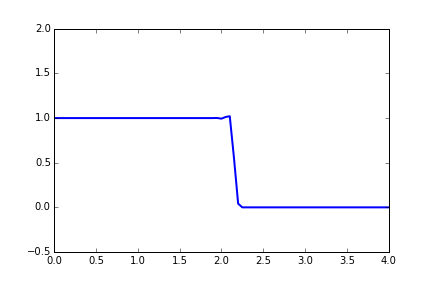
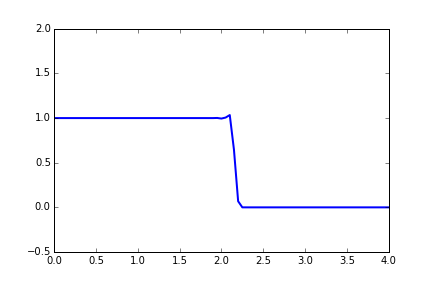
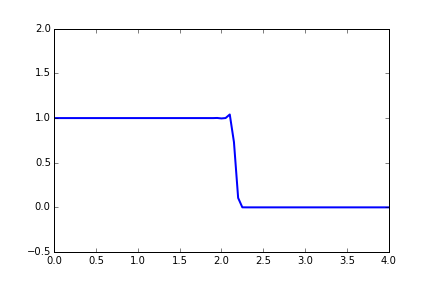
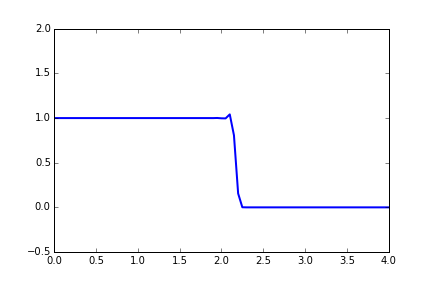
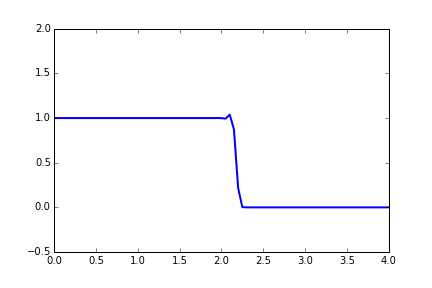
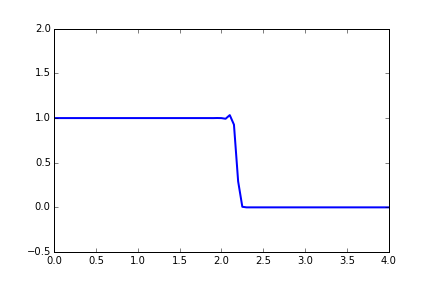
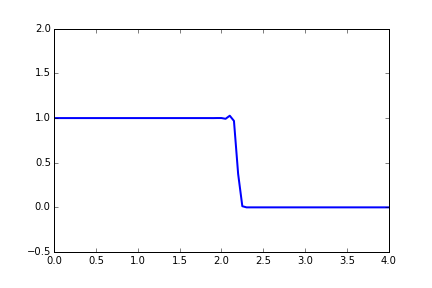
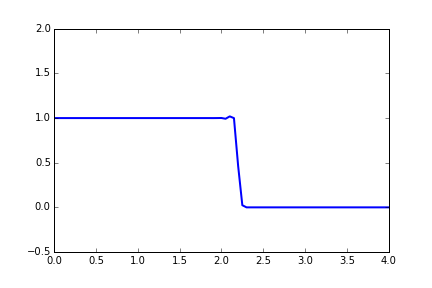
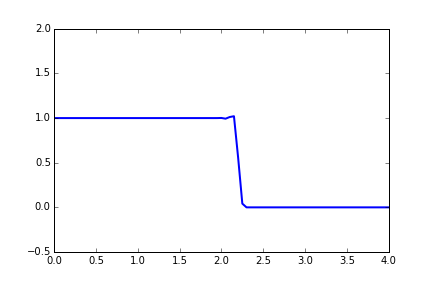
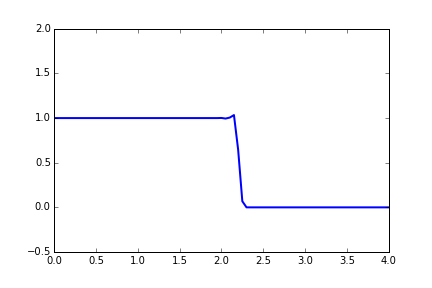
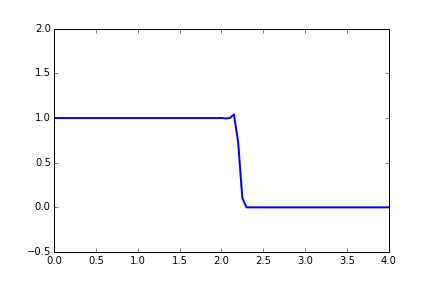
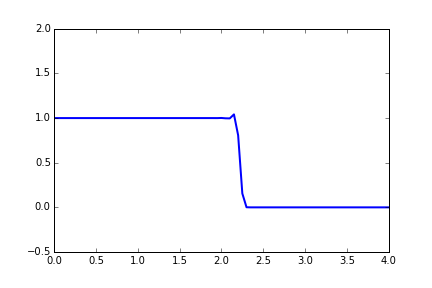
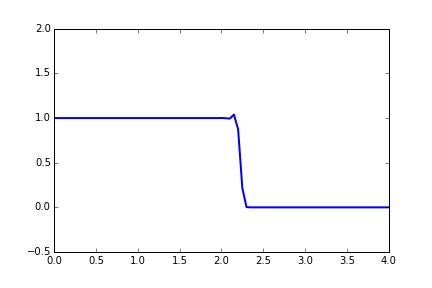
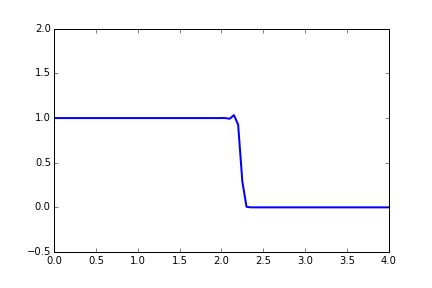
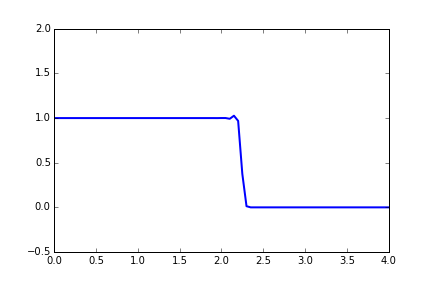
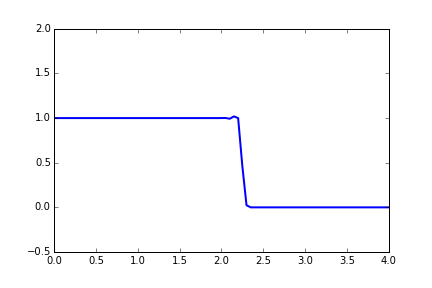
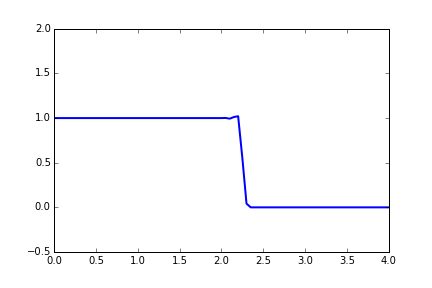
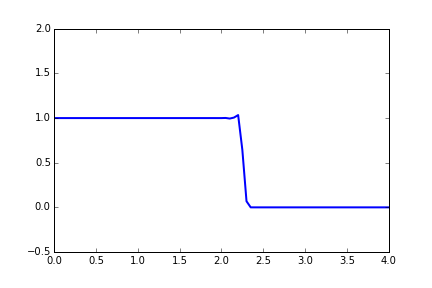
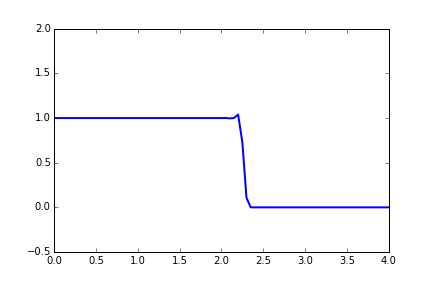
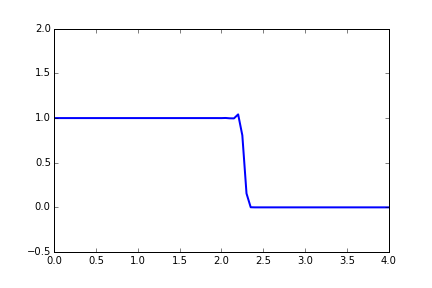
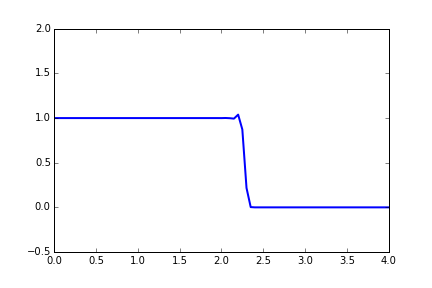
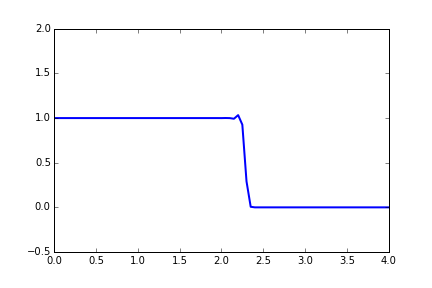
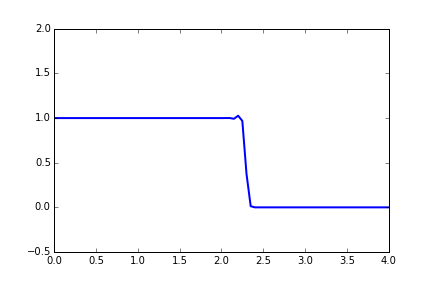
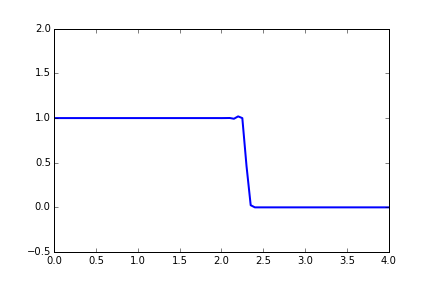
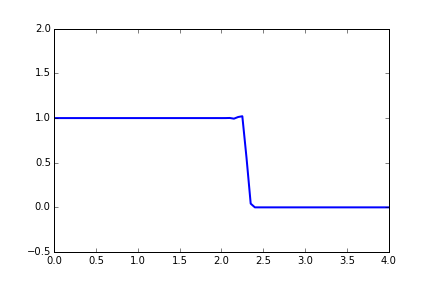
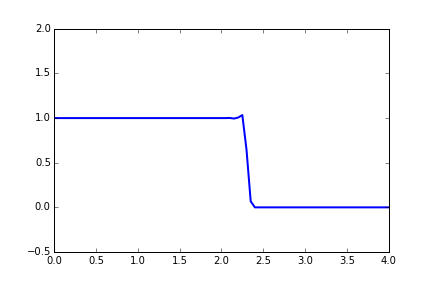
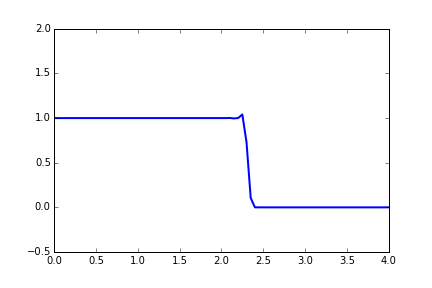
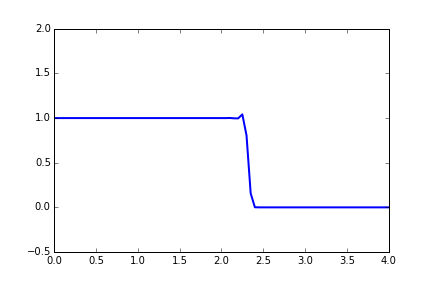
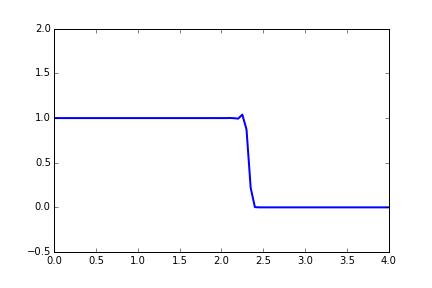
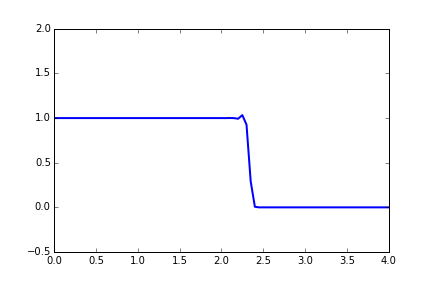
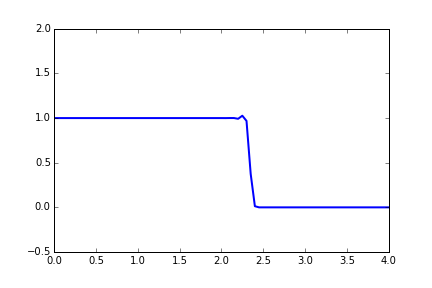
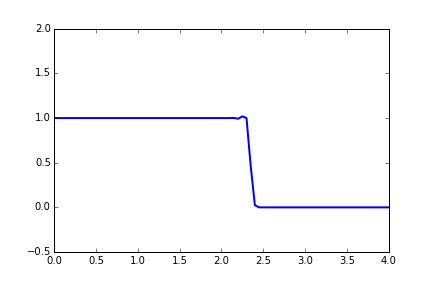
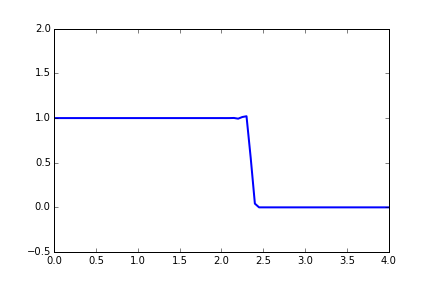
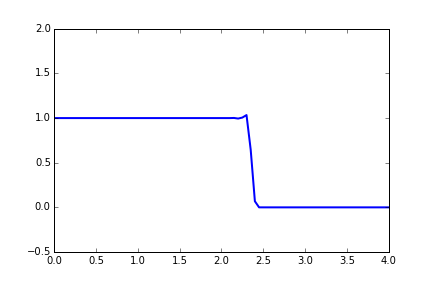
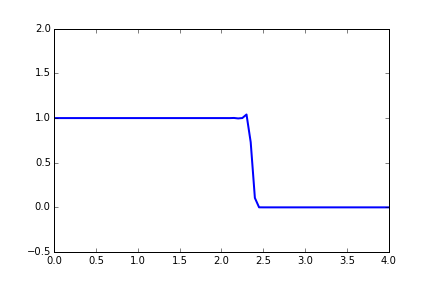
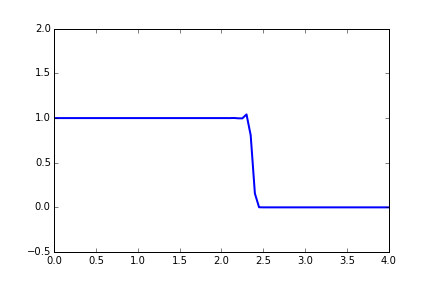
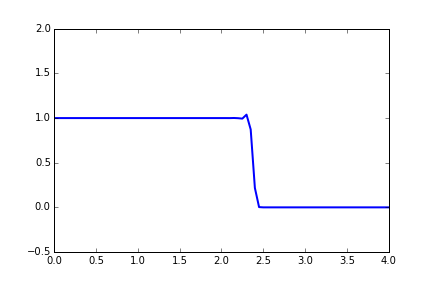
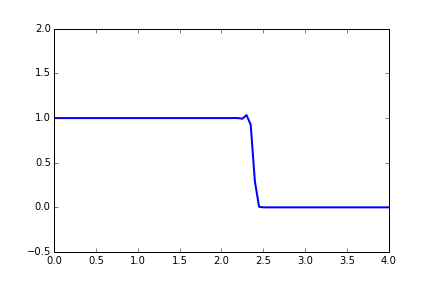
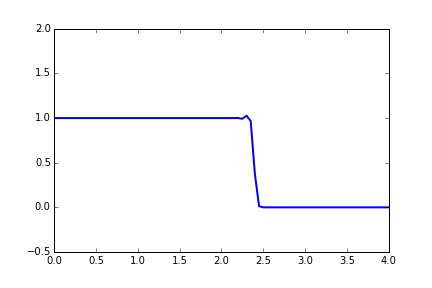
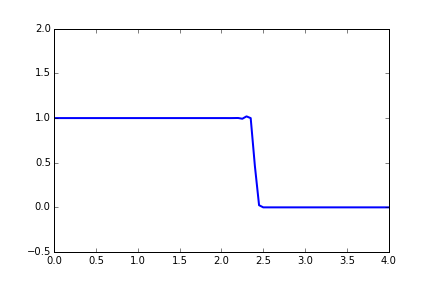
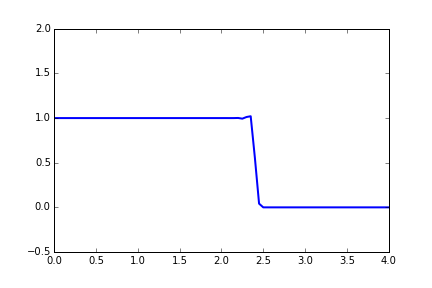

In [206]:
u=u_initial()
sigma=1
dt=sigma*dx

un=maccormack(u,nt,dt,dx)

fig=plt.figure();
ax=plt.axes(xlim=(0,4),ylim=(-0.5,2));
line,=ax.plot([],[],lw=2);

anim=animation.FuncAnimation(fig,animate,frames=un,interval=50)
display_animation(anim,default_mode='once')